<a href="https://colab.research.google.com/github/leisafira/Final-Project-Customer-Marketing/blob/main/AB_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cookie_cats.csv')

data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# get data shape
data.shape

(90189, 5)

In [4]:
# Overview data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [5]:
# data cleaning
data.duplicated(['userid']).sum()

0

In [6]:
data.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [7]:
# Create data control
data_control = data[data["version"] == "gate_30"]

data_control.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
13,2179,gate_30,39,True,False


In [8]:
# Create data treatment
data_treatment = data[data["version"] == "gate_40"]

data_treatment.head()

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
7,1444,gate_40,2,False,False


In [9]:
# find n user in each group
# n user in data_control
n_control = data_control.shape[0]

n_control

44700

In [10]:
# n user in data treatment
n_treatment = data_treatment.shape[0]

n_treatment

45489

In [11]:
# find user in 1st day retention in control group
n_retention_1_control = data_control['retention_1'].sum()
n_retention_1_control

20034

In [12]:
# find user in 7th day retention in control group
n_retention_7_control = data_control['retention_7'].sum()
n_retention_7_control

8502

In [13]:
# find user in 1st day retention in treatment group
n_retention_1_treatment = data_treatment['retention_1'].sum()
n_retention_1_treatment

20119

In [14]:
# find user in 7th day retention in treatment group
n_retention_7_treatment = data_treatment['retention_7'].sum()
n_retention_7_treatment

8279

In [15]:
# find retention rate in both groups
rr_1_control = n_retention_1_control/n_control
rr_7_control = n_retention_7_control/n_control

rr_1_treatment = n_retention_1_treatment/n_treatment
rr_7_treatment = n_retention_7_treatment/n_treatment

print(f"1st day retention in control group {rr_1_control:.3f}")
print(f"7th day retention in control group {rr_7_control:.3f}")
print(f"1st day retention in treatment group {rr_1_treatment:.3f}")
print(f"7th day retention in treatment group {rr_7_treatment:.3f}")

1st day retention in control group 0.448
7th day retention in control group 0.190
1st day retention in treatment group 0.442
7th day retention in treatment group 0.182


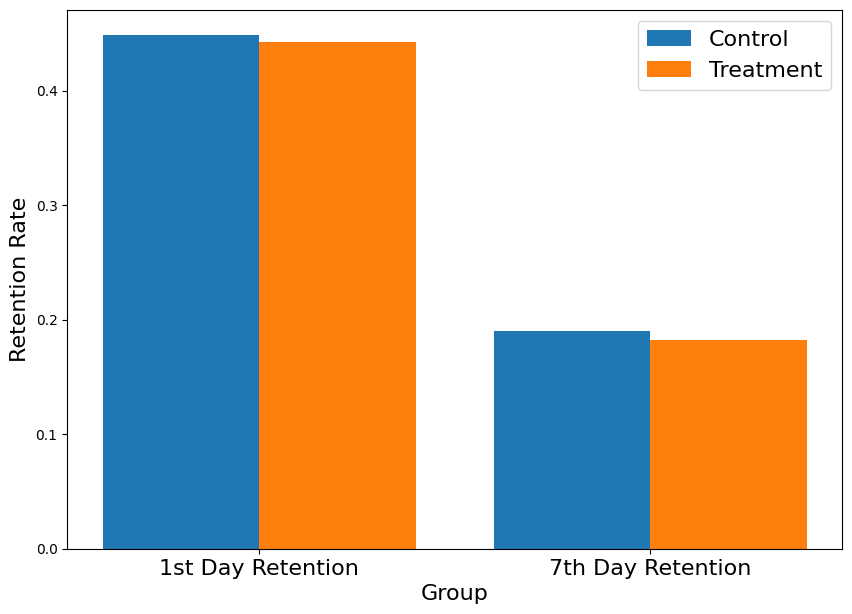

In [16]:
# Visualize
import matplotlib.pyplot as plt
# Define group labels and bar positions
groups = ["1st Day Retention", "7th Day Retention"]
positions = np.arange(len(groups))

# Visualize
fig, ax = plt.subplots(figsize=(10, 7))

# Create grouped bar chart
width = 0.4  # Width of the bars
ax.bar(positions - width / 2, [rr_1_control, rr_7_control], width=width, label="Control")
ax.bar(positions + width / 2, [rr_1_treatment, rr_7_treatment], width=width, label="Treatment")

# Styling plot
ax.set_ylabel("Retention Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticks(positions)
ax.set_xticklabels(groups, fontsize=16)
ax.legend(fontsize=16)
plt.show()

We want to find out whether moving the "gate" of the game from level 30 to level 40 will improve both 1st day ($rc$ and $rt$) and 7th day retention, thus we do hypothesis tests for both retention. The status quo is both gates will result in the same retention, and the result in moving is hopefully will increase retention. The null hypothesis ($H_0$) and the alternative hypothesis ($H_1$) are:

$$H_0 : rt = rc$$
$$H_1 : rt > rc$$

- Set siginificance level (alpha)
- Significance level = 0.05

In [17]:
# Create count retention  & total observation
count_retention_1  = [n_retention_1_treatment, n_retention_1_control]
count_observation = [n_treatment, n_control]

In [18]:
# Create alternative
alternative_option = "larger"

In [24]:
# import library
from statsmodels.stats.proportion import proportions_ztest

# Panggil fungsi
z_stat_1, p_value_1 = proportions_ztest(count = count_retention_1,
                                       nobs = count_observation,
                                       alternative = alternative_option)

print(f"Z stats 1st day retention : {z_stat_1:.4f}")
print(f"P-value 1st day retention : {p_value_1:.4f}")

Z stats 1st day retention : -1.7841
P-value 1st day retention : 0.9628


In making statistical test decisions, we can use:
- Comparison z-statistics with critical value
    - One-tailed (right), $z > z_{\alpha}$  → reject $H_0$

- Comparison p-value with alpha
  - pvalue < $\alpha$ → reject $H_0$

In the next step, we will look for the critical value to be compared with the z-statistics. We use a significance level of 5%

In [25]:
from scipy import stats

# critical value
alpha= 0.05
z_crit = stats.norm.ppf(1-alpha)

print(f"z critical value : {z_crit:.4f}")

z critical value : 1.6449


In [26]:
# Make decisions from z-stats and z-crit
if z_stat_1 > z_crit:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Fail to Reject Null Hypothesis


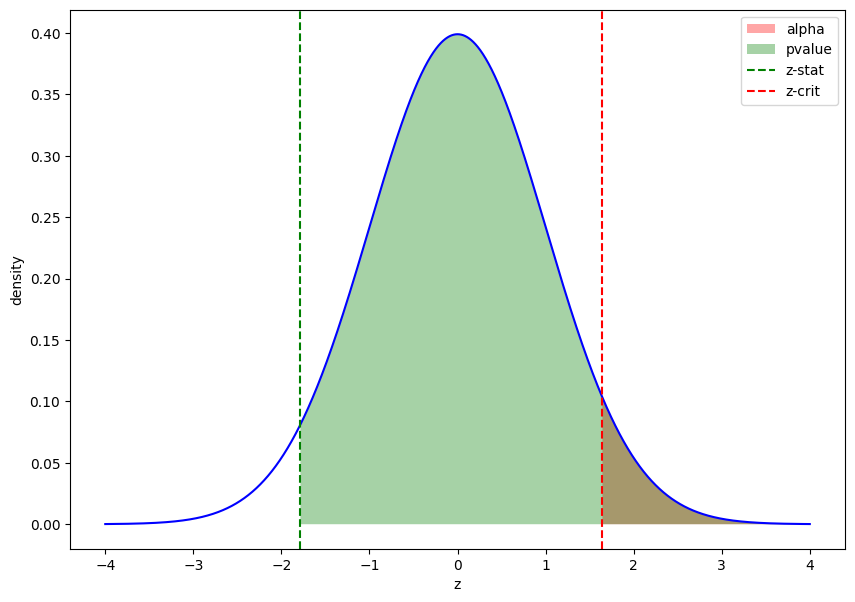

z statistics 1st day retention : -1.7841
z critical : 1.6449


In [28]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot sample distribution
x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.norm.pdf(x, 0, 1),
         color='blue')

# plot alpha region
x_alpha = np.arange(z_crit,4, 0.01)
y_alpha = stats.norm.pdf(x_alpha)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(z_stat_1,4, 0.01)
y_pvalue = stats.norm.pdf(x_pvalue)
plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot z-crit and z-stats
plt.axvline(np.round(z_stat_1, 4),
            color ="green",
            linestyle = "--",
            label ="z-stat")

plt.axvline(z_crit,
            color ="red",
            linestyle = "--",
            label ="z-crit")

plt.legend()
plt.xlabel("z")
plt.ylabel("density")
plt.show()

print(f"z statistics 1st day retention : {z_stat_1:.4f}")
print(f"z critical : {z_crit:.4f}")

Now let's do the same test for 7th day retention.

In [29]:
# Create count retention  & total observation
count_retention_7  = [n_retention_7_treatment, n_retention_7_control]
count_observation = [n_treatment, n_control]

In [30]:
# Create alternative
alternative_option = "larger"

In [32]:
# import library
from statsmodels.stats.proportion import proportions_ztest

# Panggil fungsi
z_stat_7, p_value_7 = proportions_ztest(count = count_retention_7,
                                       nobs = count_observation,
                                       alternative = alternative_option)

print(f"Z stats 7th day retention : {z_stat_7:.4f}")
print(f"P-value 7th day retention : {p_value_7:.4f}")

Z stats 7th day retention : -3.1644
P-value 7th day retention : 0.9992


In [33]:
# Make decisions from z-stats and z-crit
if z_stat_7 > z_crit:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Fail to Reject Null Hypothesis


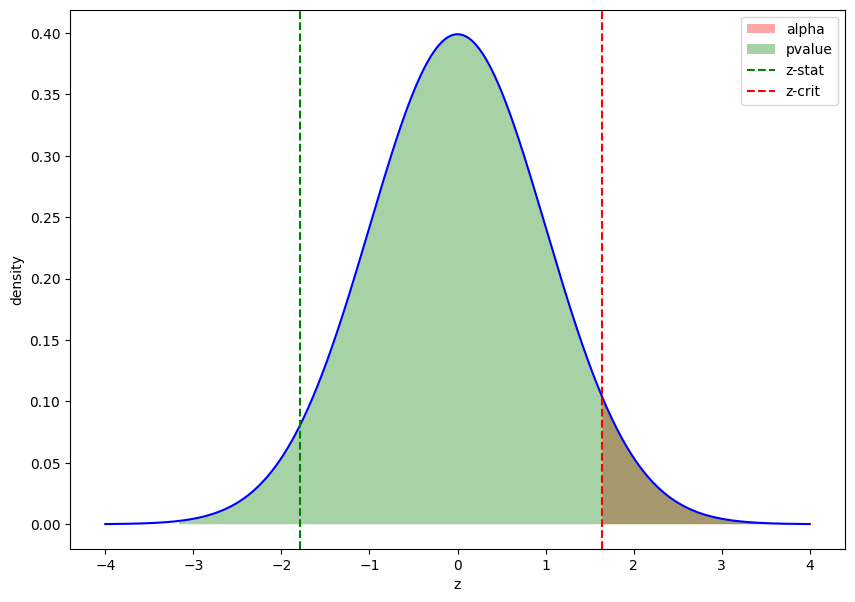

z statistics 7th day retention : -3.1644
z critical : 1.6449


In [34]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot sample distribution
x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.norm.pdf(x, 0, 1),
         color='blue')

# plot alpha region
x_alpha = np.arange(z_crit,4, 0.01)
y_alpha = stats.norm.pdf(x_alpha)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(z_stat_7,4, 0.01)
y_pvalue = stats.norm.pdf(x_pvalue)
plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot z-crit and z-stats
plt.axvline(np.round(z_stat_1, 4),
            color ="green",
            linestyle = "--",
            label ="z-stat")

plt.axvline(z_crit,
            color ="red",
            linestyle = "--",
            label ="z-crit")

plt.legend()
plt.xlabel("z")
plt.ylabel("density")
plt.show()

print(f"z statistics 7th day retention : {z_stat_7:.4f}")
print(f"z critical : {z_crit:.4f}")